In [119]:
import torch
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

matplotlib.rcParams['figure.figsize'] = (30.0, 10.0)

Text(0.5, 1.0, '$y = tanh(x)$')

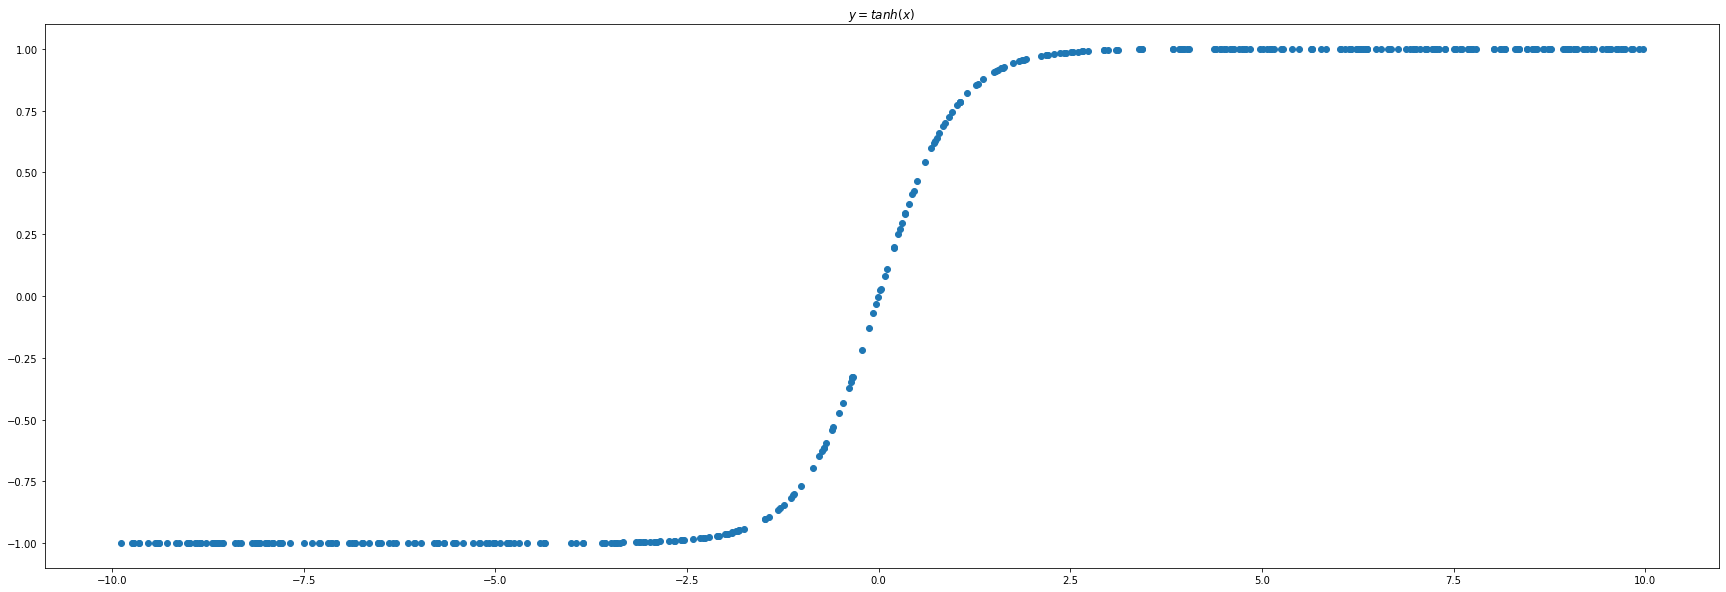

In [120]:
x_train = torch.rand(400)
x_train = x_train * 20.0 - 10.0

y_train = torch.tanh(x_train)

plt.plot(x_train.numpy(), y_train.numpy(), 'o')
plt.title('$y = tanh(x)$')

Text(0.5, 1.0, 'Gaussian noise')

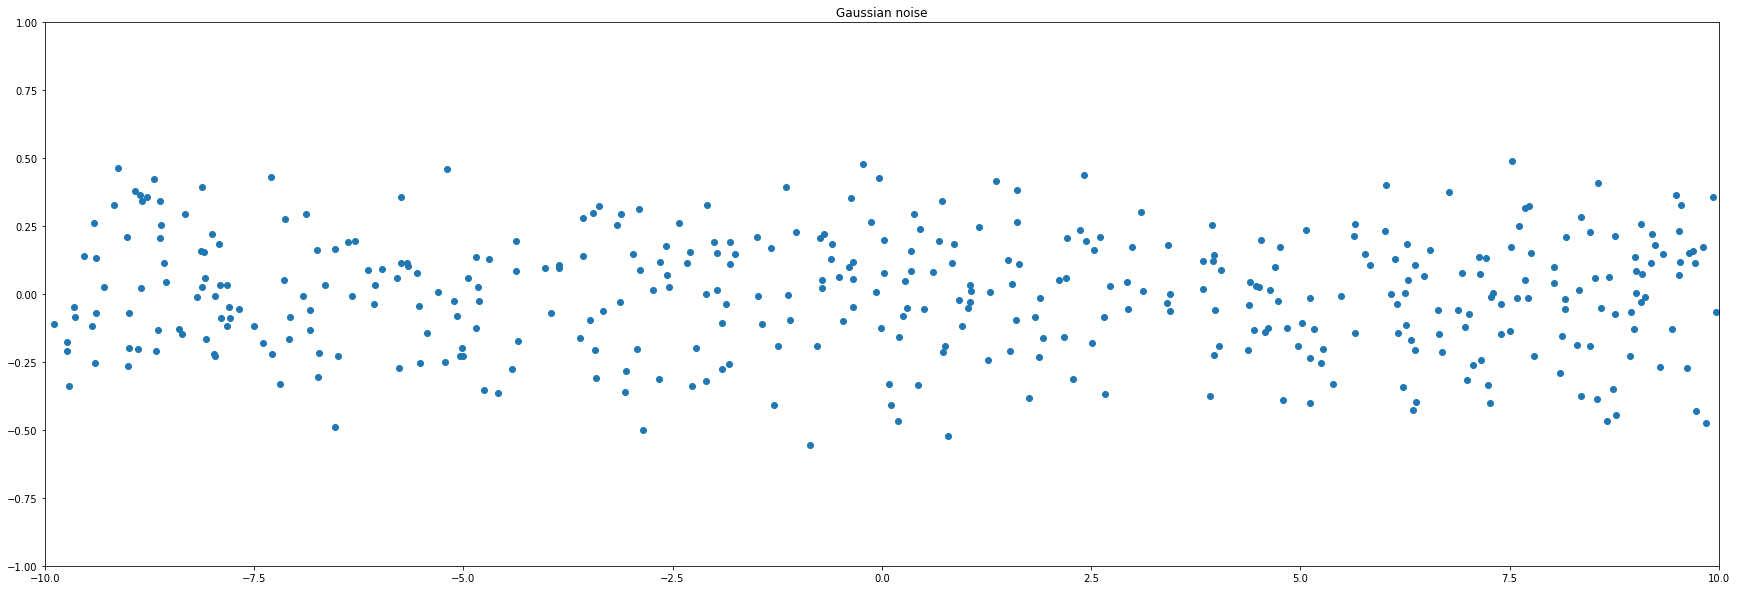

In [121]:
noise = torch.randn(y_train.shape) / 5.

plt.plot(x_train.numpy(), noise.numpy(), 'o')
plt.axis([-10,10,-1,1])
plt.title('Gaussian noise')

Text(0, 0.5, 'y_train')

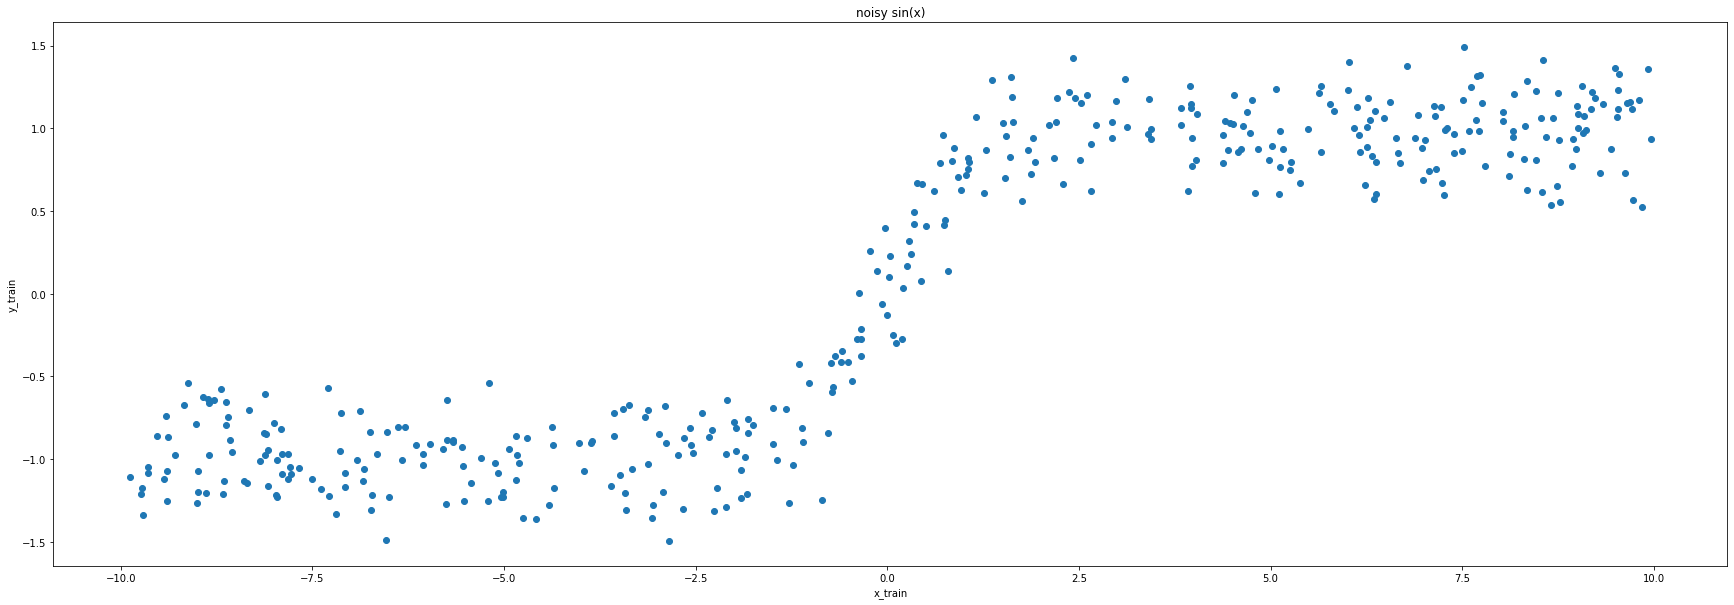

In [122]:
y_train = y_train + noise
plt.plot(x_train.numpy(), y_train.numpy(), 'o')
plt.title('noisy tanh(x)')
plt.xlabel('x_train')
plt.ylabel('y_train')

In [123]:
x_train.unsqueeze_(1)
y_train.unsqueeze_(1)

tensor([[-0.8677],
        [ 1.3557],
        [ 1.0369],
        [ 1.1849],
        [-1.3161],
        [ 1.0782],
        [ 1.1353],
        [-0.9243],
        [ 0.7049],
        [ 1.0329],
        [-1.2018],
        [-1.1328],
        [-1.2099],
        [-0.6814],
        [ 0.0764],
        [-0.5628],
        [-1.0475],
        [ 0.6699],
        [-0.9135],
        [-1.1808],
        [-1.1188],
        [ 1.0358],
        [ 0.2429],
        [ 1.1196],
        [-0.9768],
        [-1.0594],
        [ 0.8078],
        [ 0.6222],
        [ 0.8666],
        [ 1.0031],
        [ 0.9051],
        [ 0.1357],
        [-0.4115],
        [ 0.9622],
        [ 1.1735],
        [ 0.8751],
        [ 0.7564],
        [-0.8264],
        [-0.9685],
        [ 0.7196],
        [ 1.2187],
        [ 1.1817],
        [ 0.6092],
        [-1.1264],
        [-1.1983],
        [-0.9768],
        [-1.2166],
        [-1.1615],
        [ 1.3289],
        [ 0.8718],
        [ 0.9715],
        [ 0.9607],
        [ 0.

Text(0, 0.5, 'y_validation')

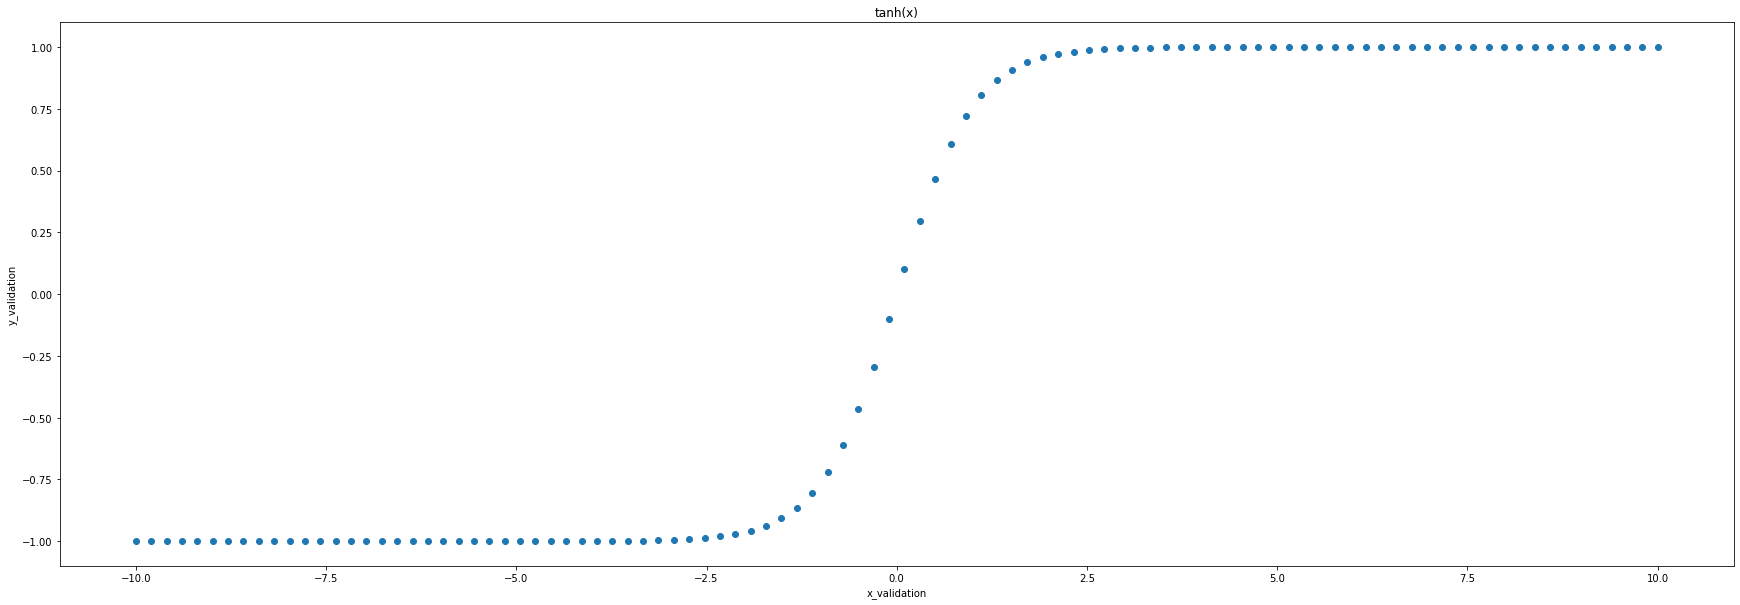

In [130]:
x_validation = torch.linspace(-10,10,100)
y_validation = torch.tanh(x_validation.data)
plt.plot(x_validation.numpy(), y_validation.numpy(), 'o')
plt.title('tanh(x)')
plt.xlabel('x_validation')
plt.ylabel('y_validation')

In [125]:
x_validation.unsqueeze_(1)
y_validation.unsqueeze_(1)

tensor([[-1.0000],
        [-1.0000],
        [-1.0000],
        [-1.0000],
        [-1.0000],
        [-1.0000],
        [-1.0000],
        [-1.0000],
        [-1.0000],
        [-1.0000],
        [-1.0000],
        [-1.0000],
        [-1.0000],
        [-1.0000],
        [-1.0000],
        [-1.0000],
        [-1.0000],
        [-1.0000],
        [-1.0000],
        [-1.0000],
        [-1.0000],
        [-1.0000],
        [-1.0000],
        [-1.0000],
        [-0.9999],
        [-0.9999],
        [-0.9998],
        [-0.9998],
        [-0.9997],
        [-0.9995],
        [-0.9992],
        [-0.9989],
        [-0.9983],
        [-0.9975],
        [-0.9962],
        [-0.9943],
        [-0.9915],
        [-0.9873],
        [-0.9810],
        [-0.9717],
        [-0.9579],
        [-0.9375],
        [-0.9078],
        [-0.8651],
        [-0.8045],
        [-0.7207],
        [-0.6088],
        [-0.4661],
        [-0.2941],
        [-0.1007],
        [ 0.1007],
        [ 0.2941],
        [ 0.

In [126]:
class SineNet(torch.nn.Module):
  def __init__(self, n_hidden_neurons):
    super(SineNet, self).__init__()
    self.fc1 = torch.nn.Linear(1, n_hidden_neurons)
    self.act1 = torch.nn.Sigmoid()
    self.fc2 = torch.nn.Linear(n_hidden_neurons, 1)

  def forward(self, x):
    x = self.fc1(x)
    x = self.act1(x)
    x = self.fc2(x)
    return x

sine_net = SineNet(50)

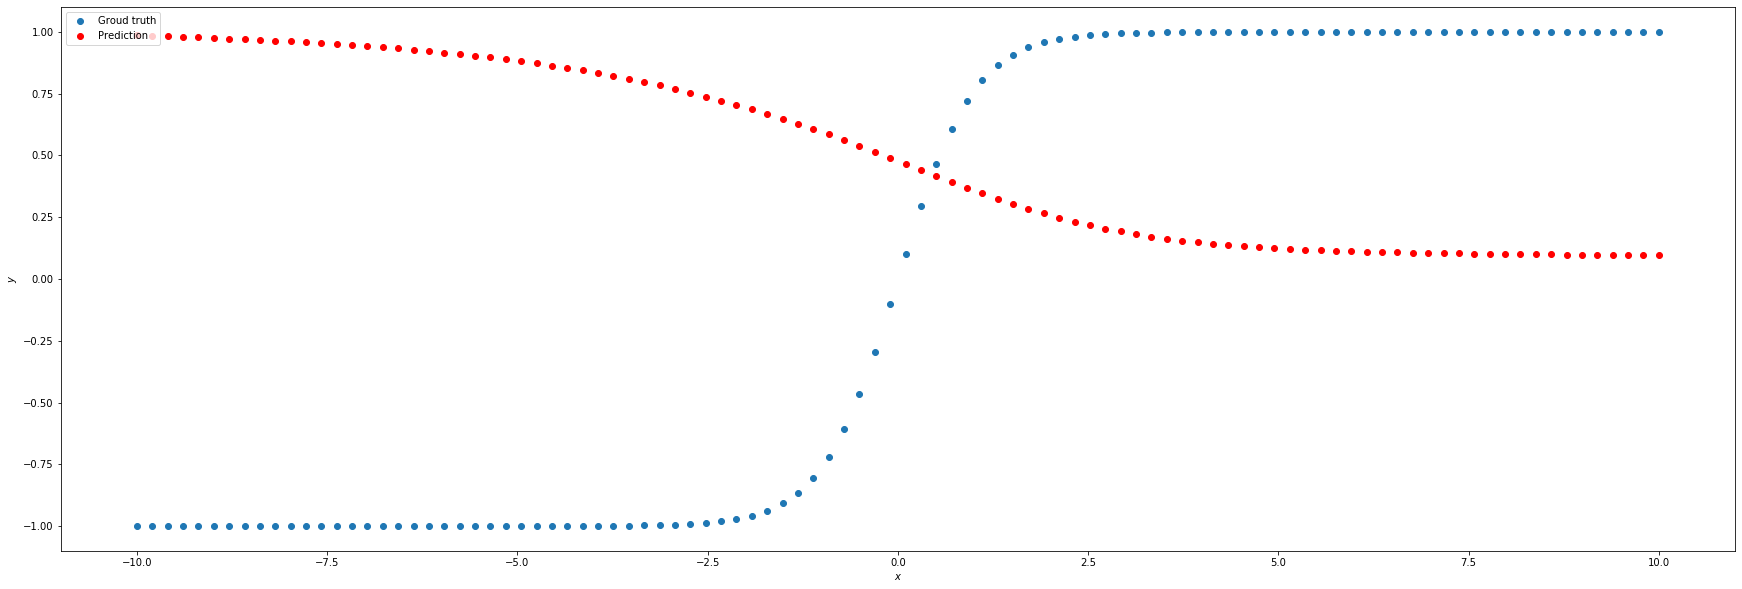

In [127]:
def predict(net, x, y):
    y_pred = net.forward(x)

    plt.plot(x.numpy(), y.numpy(), 'o', label='Groud truth')
    plt.plot(x.numpy(), y_pred.data.numpy(), 'o', c='r', label='Prediction');
    plt.legend(loc='upper left')
    plt.xlabel('$x$')
    plt.ylabel('$y$')

predict(sine_net, x_validation, y_validation)

In [128]:
optimizer = torch.optim.Adam(sine_net.parameters(), lr=0.01)
def loss(pred, target):
  squares = (pred-target)**2
  return squares.mean()

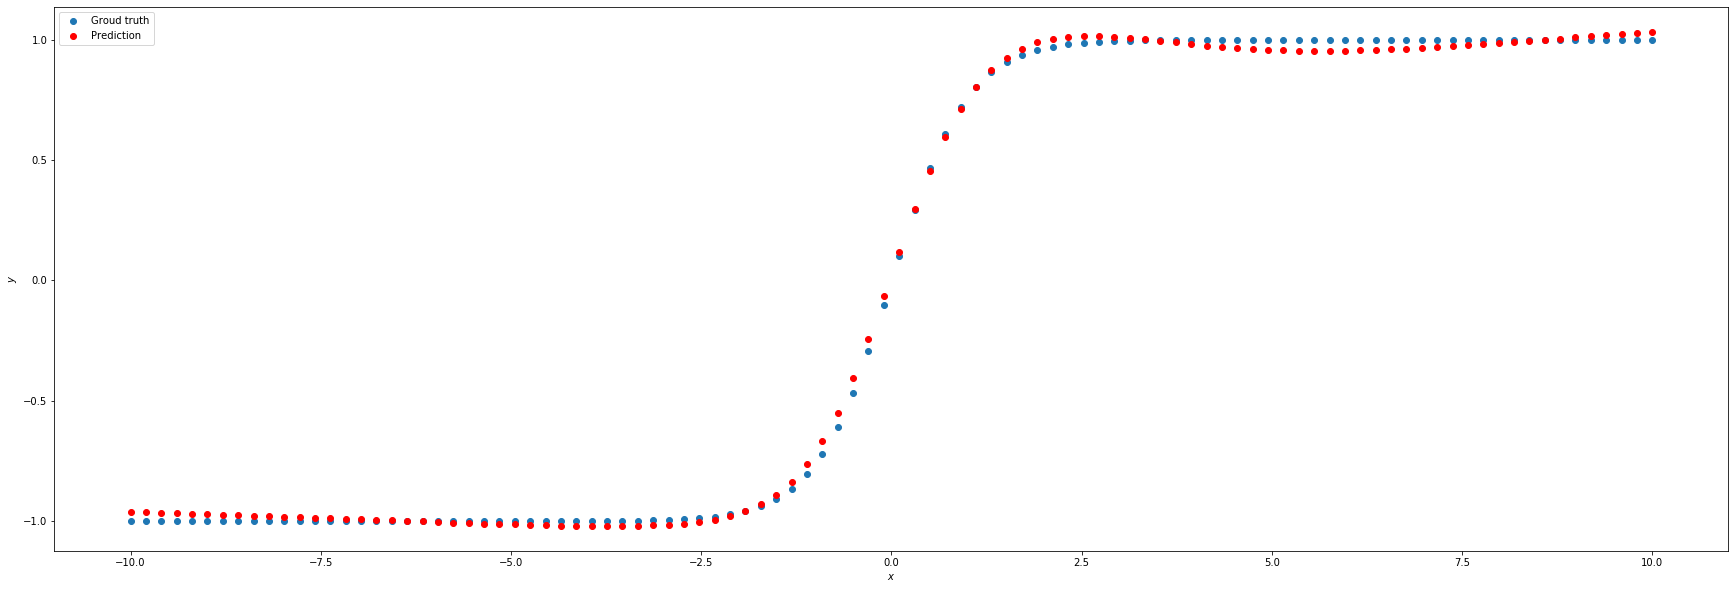

In [129]:
for epoch_index in range(2000):
  optimizer.zero_grad()

  y_pred = sine_net.forward(x_train)
  loss_val = loss(y_pred, y_train)

  loss_val.backward()

  optimizer.step()

predict(sine_net, x_validation, y_validation)